In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from dateutil.parser import parse

df = pd.read_csv("future-sales-data/sales_train.csv", parse_dates=['date'])
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_category_id
0,2013-01-01,0,0,32,221.0,4.0,40
1,2013-01-01,0,1,32,221.0,3.0,40
2,2013-01-01,0,3,32,349.0,2.0,40
3,2013-01-01,0,4,32,349.0,1.0,40
4,2013-01-01,0,5,32,349.0,2.0,40
...,...,...,...,...,...,...,...
1766433,2015-10-01,33,55,12733,1490.0,2.0,76
1766434,2015-10-01,33,55,13092,2000.0,1.0,36
1766435,2015-10-01,33,55,18060,172.0,1.0,44
1766436,2015-10-01,33,57,15925,11899.0,1.0,72


In [2]:
def getItemData(df, shopId, itemId):
    return df.loc[(df['shop_id'] == shopId) & (df['item_id'] == itemId)]

def plotItemData(df, shopId, itemId):
    getItemData(df, shopId, itemId).plot(x='date_block_num', y='item_cnt_day')
    
getItemData(df, 59, 22087)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_category_id
358282,2013-01-01,0,59,22087,79.000000,5.0,83
358312,2013-02-01,1,59,22087,79.000000,3.0,83
358343,2013-03-01,2,59,22087,79.000000,1.0,83
358370,2013-04-01,3,59,22087,79.000000,3.0,83
358398,2013-05-01,4,59,22087,79.000000,7.0,83
358429,2013-06-01,5,59,22087,79.000000,16.0,83
358460,2013-07-01,6,59,22087,79.000000,12.0,83
358487,2013-08-01,7,59,22087,79.000000,8.0,83
358513,2013-09-01,8,59,22087,79.000000,13.0,83
358533,2013-10-01,9,59,22087,79.000000,7.0,83


In [3]:
series = pd.date_range(start='2013-01-01', periods=36, freq='M').map(lambda d: d.replace(day=1))

def fillZeros(df, series):
    df = df.reindex(series)
    df['date_block_num'] = (df.index.map(lambda d: (d.year-2013)*12+d.month-1))
    if 'shop_id' in df:
        df['shop_id'] = df['shop_id'].fillna(method='ffill').fillna(method='bfill')
    if 'item_id' in df:
        df['item_id'] = df['item_id'].fillna(method='ffill').fillna(method='bfill')
    if 'item_category_id' in df:
        df['item_category_id'] = df['item_category_id'].fillna(method='ffill').fillna(method='bfill')
    if 'item_price' in df:
        df['item_price'] = df['item_price'].fillna(method='ffill').fillna(method='bfill')
    df['item_cnt_month'] = df['item_cnt_month'].fillna(0)
    return df

def getShopItemData(df, shopId, itemId):
    ans = df.loc[(df['shop_id'] == shopId) & (df['item_id'] == itemId)].set_index('date')
    return fillZeros(ans, series)

def getItemData(df, itemId):
    df_item = df.groupby(['date', 'date_block_num', 'item_id', 'item_category_id']).agg({"item_price": "mean", "item_cnt_month": "sum"}).reset_index()
    ans = df_item.loc[(df_item['item_id'] == itemId)].set_index('date')
    return fillZeros(ans, series)

In [4]:
plotItemData(df, 59, 22087)

TypeError: getItemData() takes 2 positional arguments but 3 were given

<ipython-input-13-e491fb5b75a6>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_add = seasonal_decompose(local_df['item_cnt_month'], model='additive', extrapolate_trend='freq', freq=12)


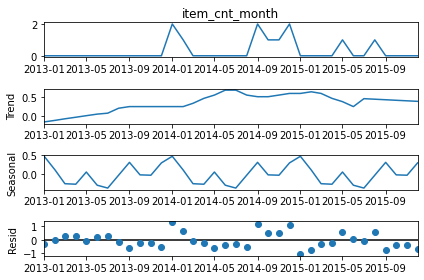

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
local_df= getShopItemData(df,2,32)
local_df
result_add = seasonal_decompose(local_df['item_cnt_month'], model='additive', extrapolate_trend='freq', freq=12)
ax = result_add.plot()

In [10]:
result_add.trend

2013-01-01    1.151175
2013-02-01    1.080662
2013-03-01    1.010150
2013-04-01    0.939637
2013-05-01    0.869124
2013-06-01    0.798611
2013-07-01    1.166667
2013-08-01    0.750000
2013-09-01    0.416667
2013-10-01    0.333333
2013-11-01    0.291667
2013-12-01    0.208333
2014-01-01    0.166667
2014-02-01    0.166667
2014-03-01    0.166667
2014-04-01    0.166667
2014-05-01    0.166667
2014-06-01    0.083333
2014-07-01    0.000000
2014-08-01    0.000000
2014-09-01    0.000000
2014-10-01    0.000000
2014-11-01    0.000000
2014-12-01    0.000000
2015-01-01    0.000000
2015-02-01    0.000000
2015-03-01    0.000000
2015-04-01    0.000000
2015-05-01    0.000000
2015-06-01    0.000000
2015-07-01   -0.017094
2015-08-01   -0.020299
2015-09-01   -0.023504
2015-10-01   -0.026709
2015-11-01   -0.029915
2015-12-01   -0.033120
Name: trend, dtype: float64